In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('/content/dataset.csv')


In [3]:
#print
print(df)

     Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenop

In [4]:
#print first 5 row
print(df.head())

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [5]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 no

In [6]:
#count missing values per colunm
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [7]:
#class distribution in 'recurred'
class_distribution = df['Recurred'].value_counts()
print("\nClass Distribution in 'recurred':")
print(class_distribution)


Class Distribution in 'recurred':
Recurred
No     275
Yes    108
Name: count, dtype: int64


In [8]:
df['Recurred'].value_counts()

,count
Recurred,
No,275
Yes,108


In [9]:
#unique value for each catogorical colunm
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique Values for '{column}':")
    print(unique_values)


Unique Values for 'Gender':
['F' 'M']

Unique Values for 'Smoking':
['No' 'Yes']

Unique Values for 'Hx Smoking':
['No' 'Yes']

Unique Values for 'Hx Radiothreapy':
['No' 'Yes']

Unique Values for 'Thyroid Function':
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Unique Values for 'Physical Examination':
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Unique Values for 'Adenopathy':
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Unique Values for 'Pathology':
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Unique Values for 'Focality':
['Uni-Focal' 'Multi-Focal']

Unique Values for 'Risk':
['Low' 'Intermediate' 'High']

Unique Values for 'T':
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

Unique Values for 'N':
['N0' 'N1b' 'N1a']

Unique Values for 'M':
['M0' 'M1']

Unique Values for 'Stage':
['I' 'II' 'IVB' 'III' 'IVA']



In [10]:

# Convert all text in object columns to lowercase and strip spaces
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

# 2. Encode categorical text columns to numeric (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# 3. Verify changes
print("Data after cleaning:")
print(df.head())

print("\nData types after cleaning:")
print(df.dtypes)

# 4. Save cleaned dataset for reuse
df.to_csv("dataset_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'dataset_cleaned.csv'")


Data after cleaning:
   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  Recurred  
0      0         2         0  
1      0         1   

In [11]:
#load cleaned dataset
df = pd.read_csv('/content/dataset_cleaned.csv')

In [12]:
#print it
print(df)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0     27       0        0           0                0                 2   
1     34       0        0           1                0                 2   
2     30       0        0           0                0                 2   
3     62       0        0           0                0                 2   
4     62       0        0           0                0                 2   
..   ...     ...      ...         ...              ...               ...   
378   72       1        1           1                1                 2   
379   81       1        1           0                1                 2   
380   72       1        1           1                0                 2   
381   61       1        1           1                1                 0   
382   67       1        1           0                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0         

In [13]:
print("Basic statistics:")
print(df.describe())

Basic statistics:
              Age      Gender     Smoking  Hx Smoking  Hx Radiothreapy  \
count  383.000000  383.000000  383.000000  383.000000       383.000000   
mean    40.866841    0.185379    0.127937    0.073107         0.018277   
std     15.134494    0.389113    0.334457    0.260653         0.134126   
min     15.000000    0.000000    0.000000    0.000000         0.000000   
25%     29.000000    0.000000    0.000000    0.000000         0.000000   
50%     37.000000    0.000000    0.000000    0.000000         0.000000   
75%     51.000000    0.000000    0.000000    0.000000         0.000000   
max     82.000000    1.000000    1.000000    1.000000         1.000000   

       Thyroid Function  Physical Examination  Adenopathy   Pathology  \
count        383.000000            383.000000  383.000000  383.000000   
mean           1.950392              2.561358    2.924282    2.550914   
std            0.630917              1.350110    1.172106    0.890257   
min            0.000000

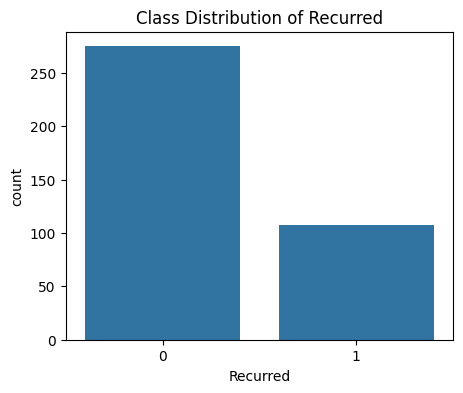

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x='Recurred', data=df)
plt.title("Class Distribution of Recurred")
plt.show()

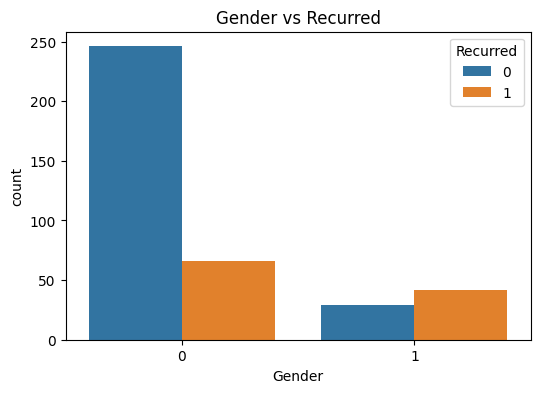

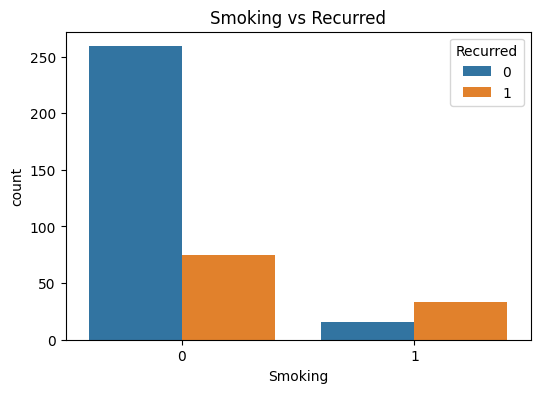

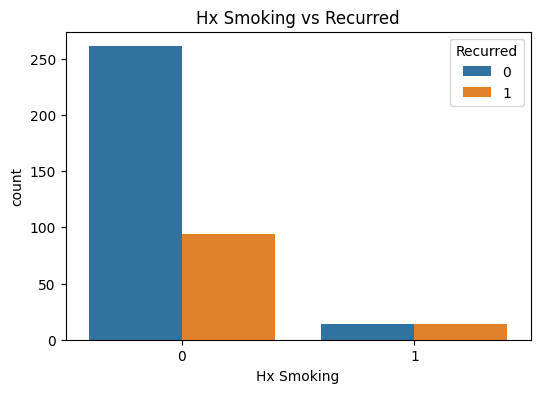

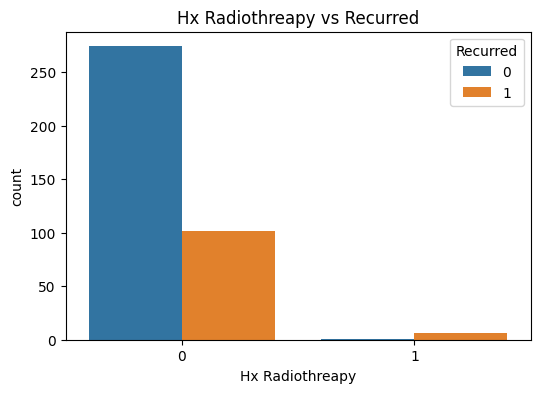

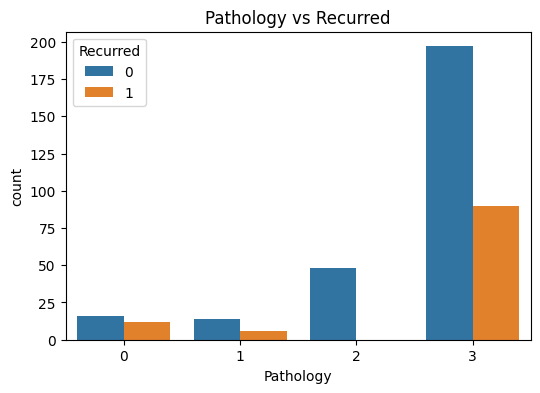

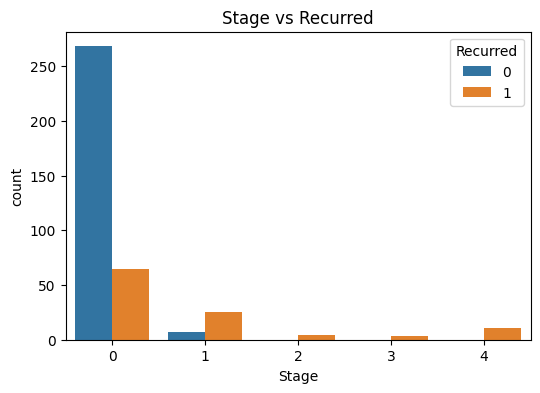

In [15]:
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Pathology', 'Stage']
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='Recurred', data=df)
        plt.title(f"{col} vs Recurred")
        plt.legend(title='Recurred')
        plt.show()

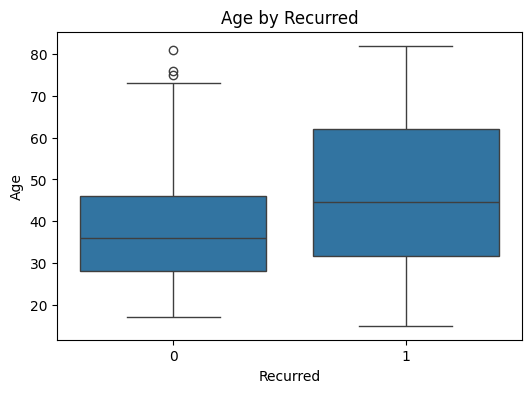

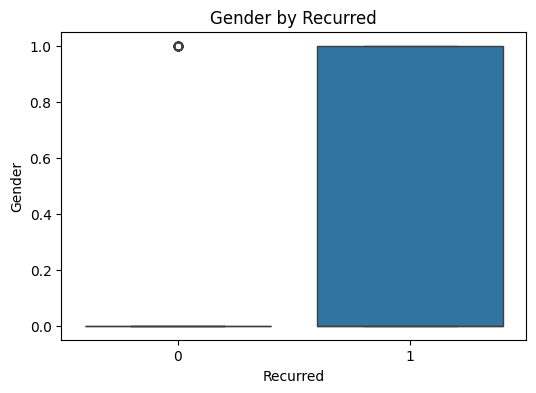

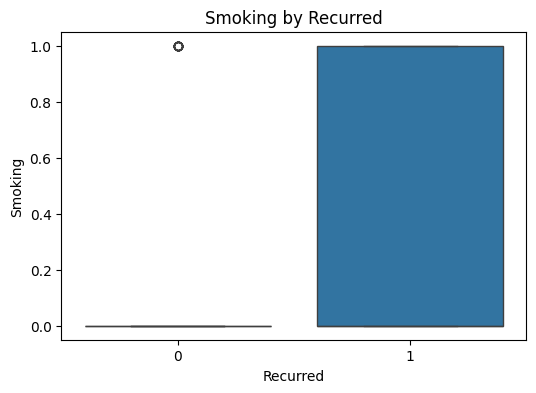

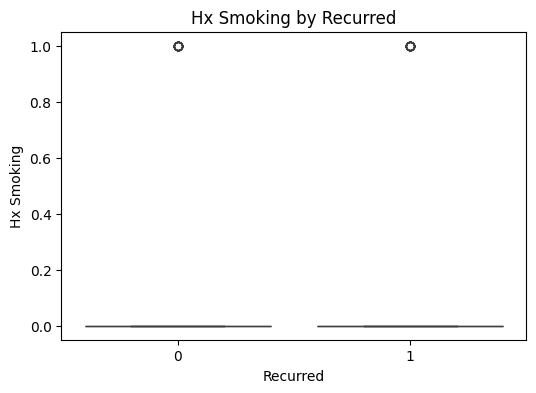

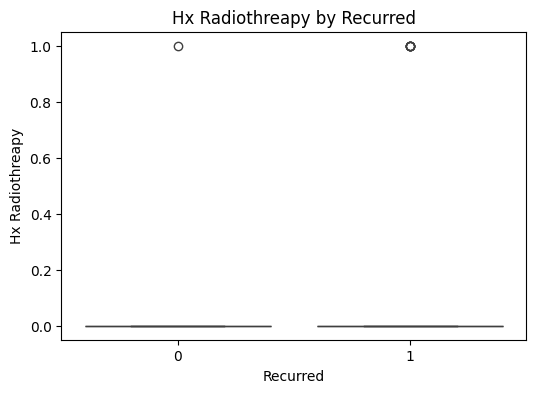

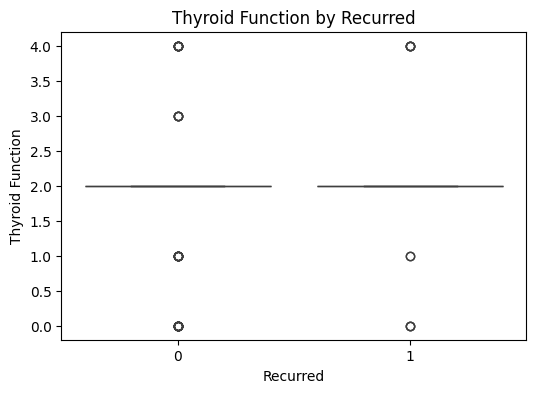

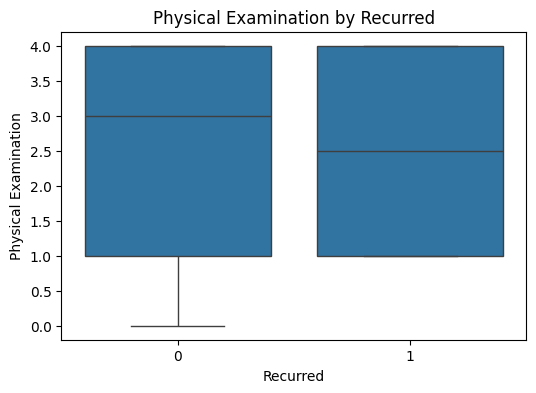

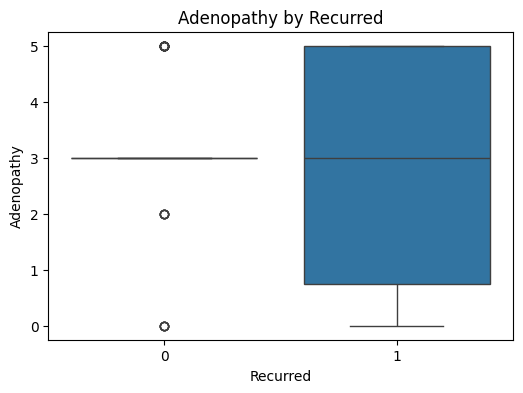

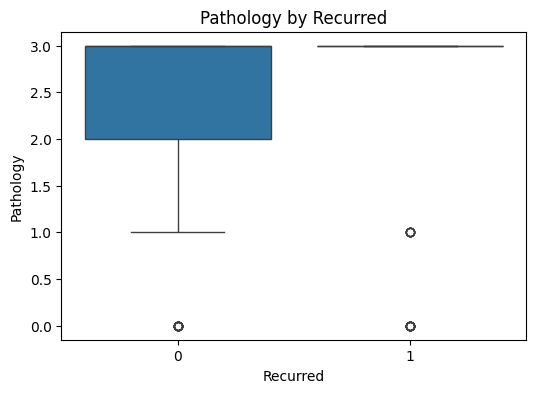

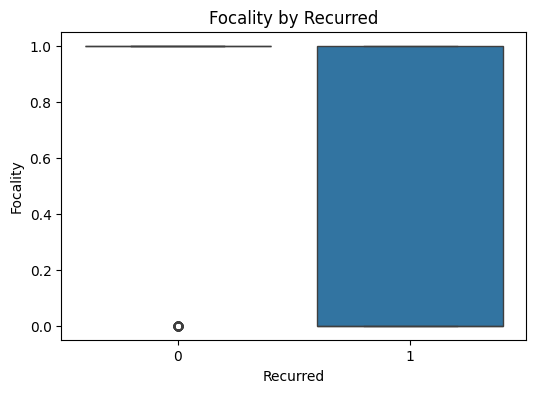

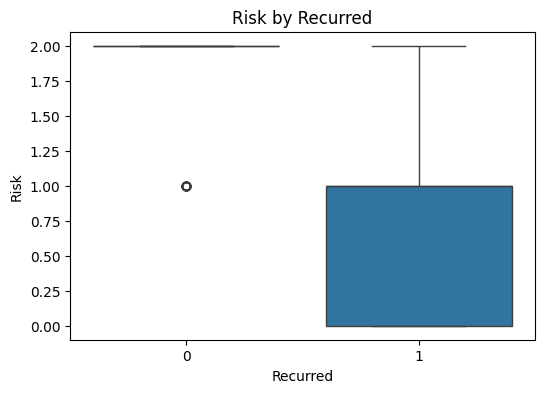

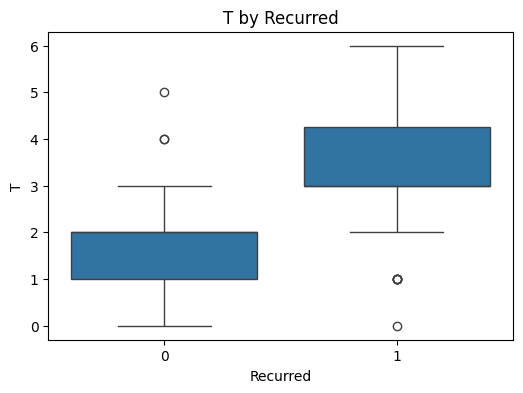

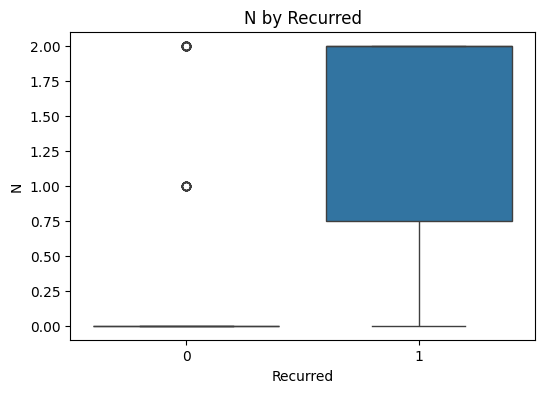

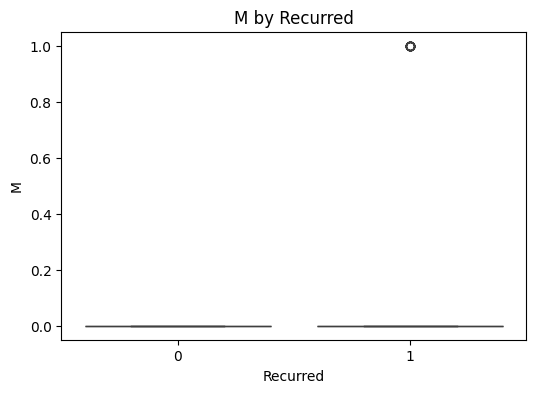

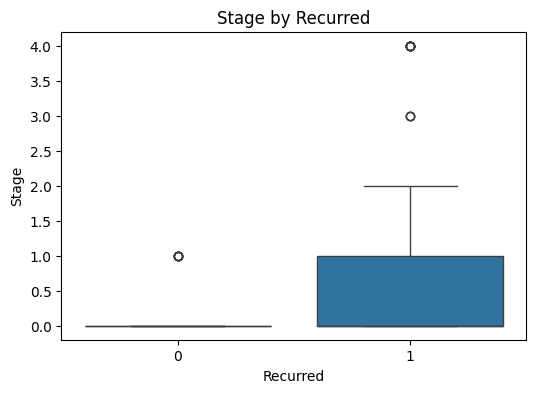

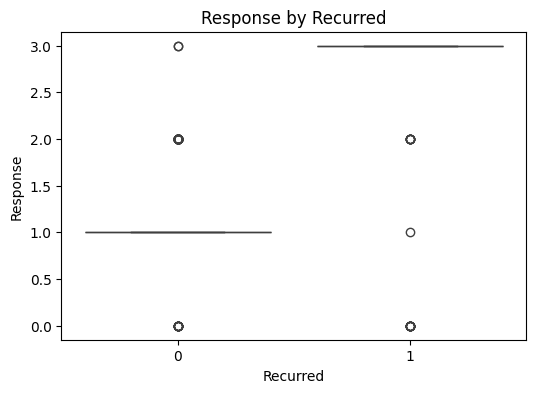

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    if col != 'Recurred':
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Recurred', y=col, data=df)
        plt.title(f"{col} by Recurred")
        plt.show()

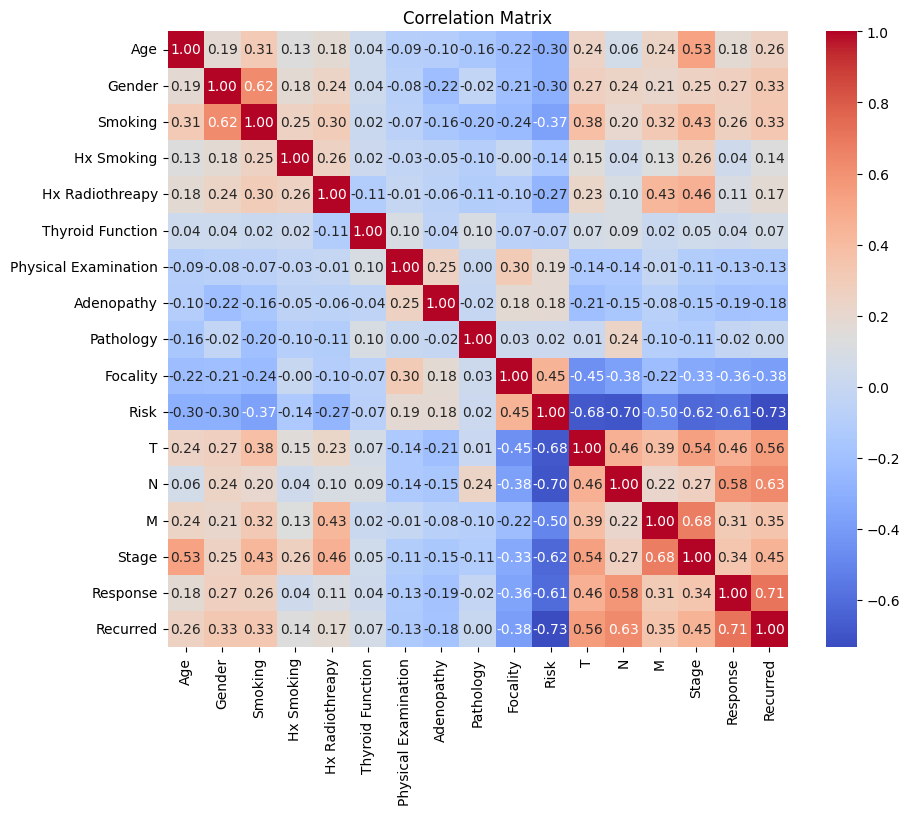

In [17]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [18]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load cleaned dataset
df = pd.read_csv("/content/dataset_cleaned.csv")

#  Split into features (X) and target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']

#  Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

#  Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.9351
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

Confusion Matrix:
[[57  1]
 [ 4 15]]

=== Random Forest ===
Accuracy: 0.9870
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

Confusion Matrix:
[[58  0]
 [ 1 18]]

=== KNN ===
Accuracy: 0.8571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.9

In [19]:
#store results for plotting
model_names = ["Logistic Regression", "Random Forest", "KNN"]

In [20]:
#rerun each model quickly to collect accuracy values and plot accuracies
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)


In [23]:
#define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [24]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
#loading csv file
df = pd.read_csv('/content/dataset_cleaned.csv')


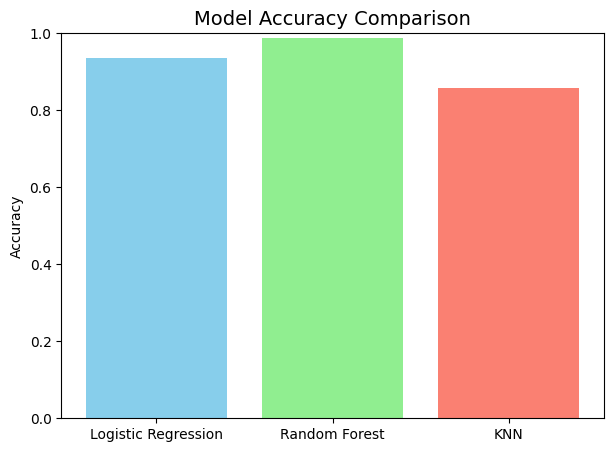

In [34]:
# Get accuracies for plotting
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(7,5))
plt.bar(model_names, accuracies, color=["skyblue", "lightgreen", "salmon"])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # accuracy ranges from 0 to 1
plt.show()

In [35]:
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print(accuracies)

[0.935064935064935, 0.987012987012987, 0.8571428571428571]


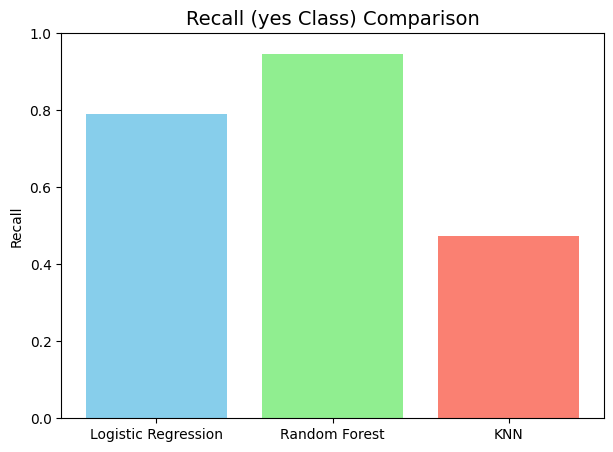

In [38]:
from sklearn.metrics import classification_report

recalls_yes = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Recall for the "Yes" class
    recalls_yes.append(report["1"]["recall"])

# Plot
plt.figure(figsize=(7,5))
plt.bar(model_names, recalls_yes, color=["skyblue", "lightgreen", "salmon"])
plt.title("Recall (yes Class) Comparison", fontsize=14)
plt.ylabel("Recall")
plt.ylim(0, 1)  # recall ranges from 0 to 1
plt.show()

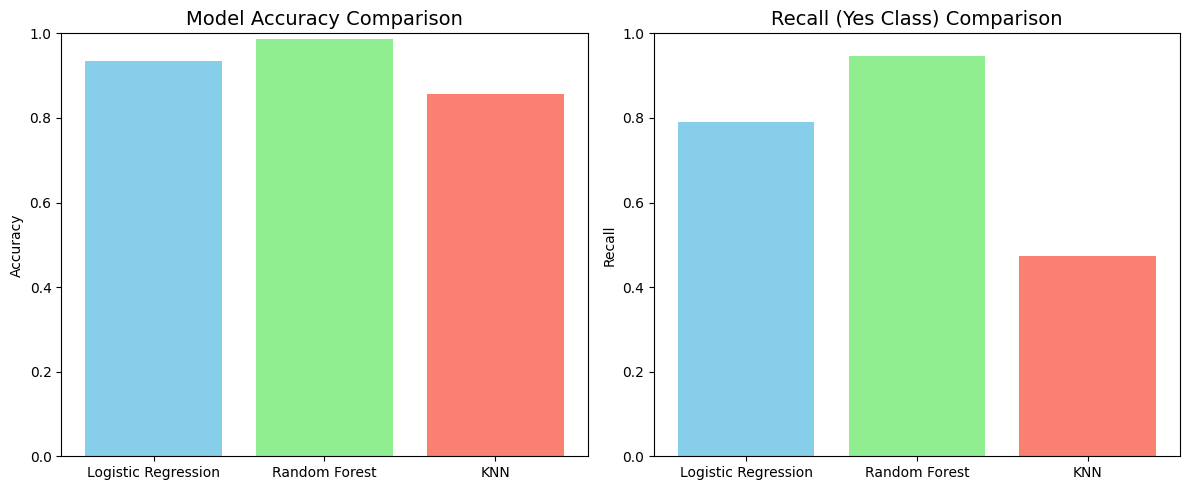

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Prepare lists for metrics
accuracies = []
recalls_yes = []

# Calculate accuracy & recall for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    accuracies.append(accuracy_score(y_test, y_pred))

    # Recall for Yes
    report = classification_report(y_test, y_pred, output_dict=True)
    recalls_yes.append(report["1"]["recall"])

# Create subplots for side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Chart
axes[0].bar(model_names, accuracies, color=["skyblue", "lightgreen", "salmon"])
axes[0].set_title("Model Accuracy Comparison", fontsize=14)
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)

# Recall Chart
axes[1].bar(model_names, recalls_yes, color=["skyblue", "lightgreen", "salmon"])
axes[1].set_title("Recall (Yes Class) Comparison", fontsize=14)
axes[1].set_ylabel("Recall")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load cleaned dataset
df = pd.read_csv("dataset_cleaned.csv")

# Features and target
X_full = df.drop('Recurred', axis=1)
y_full = df['Recurred']

# 5.1 Train final model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_full, y_full)

# 5.2 Predict on new data (example data)
# Replace with real patient details in numeric form
new_patients = pd.DataFrame({
    'Age': [45, 60],
    'Gender': [0, 1],
    'Smoking': [1, 0],
    'Hx Smoking': [0, 0],
    'Hx Radiothreapy': [0, 1],
    'Thyroid Function': [1, 1],
    'Physical Examination': [0, 1],
    'Adenopathy': [0, 1],
    'Pathology': [1, 2],
    'Focality': [0, 1],
    'Risk': [1, 2],
    'T': [1, 2],
    'N': [0, 1],
    'M': [0, 0],
    'Stage': [1, 3],
    'Response': [1, 0]
})

predictions = final_model.predict(new_patients)
print("Predictions for new patients:", predictions)

# 5.3 Save the model
joblib.dump(final_model, "thyroid_recurrence_model.pkl")


Predictions for new patients: [0 0]


['thyroid_recurrence_model.pkl']

In [42]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load("thyroid_recurrence_model.pkl")

# Example new patient data (same format & encoding as before)
new_patients_future = pd.DataFrame({
    'Age': [55],
    'Gender': [1],
    'Smoking': [0],
    'Hx Smoking': [0],
    'Hx Radiothreapy': [1],
    'Thyroid Function': [1],
    'Physical Examination': [0],
    'Adenopathy': [1],
    'Pathology': [2],
    'Focality': [1],
    'Risk': [2],
    'T': [2],
    'N': [1],
    'M': [0],
    'Stage': [3],
    'Response': [0]
})

# Predict recurrence
future_prediction = loaded_model.predict(new_patients_future)
print("Prediction for the new patient:", future_prediction)


Prediction for the new patient: [0]


In [44]:
import pandas as pd
import joblib

# Load your saved model
model = joblib.load("thyroid_recurrence_model.pkl")

# Column names
columns = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
           'Thyroid Function', 'Physical Examination', 'Adenopathy',
           'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Ask user to enter values
print("Enter values in order:", columns)

values = list(map(int, input("Enter values separated by spaces: ").split()))

# Create DataFrame
new_patient = pd.DataFrame([values], columns=columns)

# Predict
prediction = model.predict(new_patient)
print("Prediction:", "Yes (Recurrence)" if prediction[0] == 1 else "No (No Recurrence)")


Enter values in order: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
Enter values separated by spaces: 30 1 0 1 0 0 0 1 1 0 1  3  0 0 3  1
Prediction: No (No Recurrence)


In [45]:
import pandas as pd
import joblib

# Load your saved model
model = joblib.load("thyroid_recurrence_model.pkl")

# Column names
columns = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
           'Thyroid Function', 'Physical Examination', 'Adenopathy',
           'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Ask user to enter values
print("Enter values in order:", columns)

values = list(map(int, input("Enter values separated by spaces: ").split()))

# Create DataFrame
new_patient = pd.DataFrame([values], columns=columns)

# Predict
prediction = model.predict(new_patient)
print("Prediction:", "Yes (Recurrence)" if prediction[0] == 1 else "No (No Recurrence)")



Enter values in order: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
Enter values separated by spaces: 60 1 1 1 1  1 1 1 2 1 2 4 1 1 4  1
Prediction: Yes (Recurrence)
